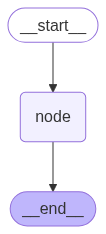

In [1]:
from dotenv import load_dotenv, find_dotenv
from langchain_openai import ChatOpenAI

from langsmith import traceable
from typing import TypedDict
from langgraph.graph import StateGraph, END
from IPython.display import display, Image


_ = load_dotenv(find_dotenv())
chat = ChatOpenAI(model = 'gpt-3.5-turbo', temperature = 0)


class State(TypedDict):
    messages: str


# @traceable
def node(state):
    return {"messages": chat.invoke(state["messages"])}


builder = StateGraph(State)
builder.add_node("node", node)

builder.set_entry_point("node")
builder.add_edge("node", END)
graph = builder.compile()


display(Image(graph.get_graph().draw_mermaid_png()))

In [2]:
graph.invoke({"messages": "What should I give as a give? Answer concise."})

{'messages': AIMessage(content="It depends on the recipient's interests and preferences. Consider giving a thoughtful gift that is meaningful to them.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 18, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BpAu8HqQGWI0jW447WqbfLyP7JzM5', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--15e83b2e-241f-460e-8871-117a34be5dd1-0', usage_metadata={'input_tokens': 18, 'output_tokens': 21, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})}